In [39]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [40]:
space = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Space Server/Space server.csv")
space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.030000e+17,GALAXY,0.027583,447,51877,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.030000e+17,GALAXY,0.117772,447,51877,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.220000e+18,STAR,-0.000402,7303,57013,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.030000e+17,GALAXY,0.014019,447,51877,229


In [41]:
space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [42]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Dropping id columns

In [43]:
space.drop('objid', axis =1, inplace = True)

In [44]:
space.drop('specobjid', axis =1, inplace = True)

In [45]:
space

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,GALAXY,0.014019,447,51877,229


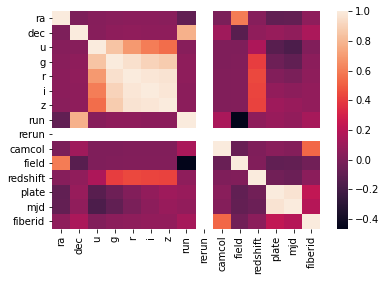

In [46]:
sns.heatmap(space.corr())

Let's convert class column into numbers

In [47]:
l = LabelEncoder()
space['class'] = l.fit_transform(space['class'])
space

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,0,0.014019,447,51877,229


In [48]:
space['class'].unique()

array([2, 0, 1])

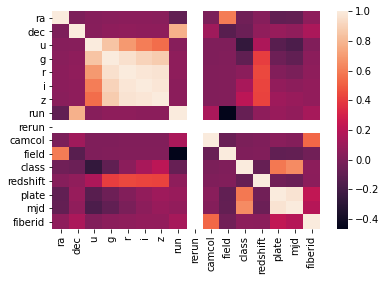

In [49]:
sns.heatmap(space.corr())

class has decent correlation with other features

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
Y = space["class"]
X = space.drop('class', axis = 1)

In [52]:
Y.shape

(10000,)

In [53]:
Y = Y.values.reshape(-1,1)
Y.shape

(10000, 1)

In [54]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.0,0.210852,-0.217630,-0.369731,1.031489,1.309311,0.668632
1,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.0,0.210852,-0.217630,-0.369849,-0.636213,-0.879197,0.911012
2,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.838061,0.0,0.210852,-0.211479,-0.053027,-0.656339,-0.609191,0.775279
3,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.0,0.210852,-0.205328,-0.369993,1.031489,1.309311,0.760736
4,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.0,0.210852,-0.205328,-0.368189,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.925337,1.455852,0.239453,0.104292,0.069416,0.087121,0.068876,1.331785,0.0,-0.389352,-0.869659,-0.298756,-0.566888,-0.705811,-0.519029
9996,-0.925553,1.461079,-0.418536,0.070402,0.220993,0.116515,0.229516,1.331785,0.0,-0.389352,-0.863508,-0.066761,-0.566888,-0.705811,-0.606286
9997,-0.920395,1.460907,0.167538,0.429347,0.634775,0.743983,0.829211,1.331785,0.0,-0.389352,-0.863508,-0.370741,3.266087,2.693094,1.303667
9998,-0.921973,1.464321,0.318018,0.569857,0.646764,0.682516,0.595986,1.331785,0.0,-0.389352,-0.857356,-0.333647,-0.566888,-0.705811,-0.601438


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# DecisionTree

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(Y_test, preddtc))
print(confusion_matrix(Y_test, preddtc))
print(classification_report(Y_test, preddtc))

0.9855
[[984  11   1]
 [ 12 178   0]
 [  3   2 809]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.93      0.94      0.93       190
           2       1.00      0.99      1.00       814

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000



In [64]:
print('Mean absolute error:', mean_absolute_error(Y_test, preddtc))
print('Mean squared error:', mean_squared_error(Y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, preddtc)))
print('R2 score is:', r2_score(Y_test, preddtc))

Mean absolute error: 0.0165
Mean squared error: 0.0205
Root Mean squared error: 0.14317821063276354
R2 score is: 0.9771388807419047


# KNeighbors

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
print(accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))

0.8935
[[932   2  62]
 [ 17 164   9]
 [121   2 691]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       996
           1       0.98      0.86      0.92       190
           2       0.91      0.85      0.88       814

    accuracy                           0.89      2000
   macro avg       0.92      0.88      0.90      2000
weighted avg       0.90      0.89      0.89      2000



In [66]:
print('Mean absolute error:', mean_absolute_error(Y_test, predknn))
print('Mean squared error:', mean_squared_error(Y_test, predknn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predknn)))
print('R2 score is:', r2_score(Y_test, predknn))

Mean absolute error: 0.198
Mean squared error: 0.381
Root Mean squared error: 0.6172519744804386
R2 score is: 0.5751177347641792


# SVC

In [67]:
svck = SVC(kernel = 'poly')
svck.fit(X_train, Y_train)
svck.score(X_train, Y_train)
predsvck = svck.predict(X_test)
print(accuracy_score(Y_test, predsvck))
print(confusion_matrix(Y_test, predsvck))
print(classification_report(Y_test, predsvck)) 

0.9245
[[969   2  25]
 [ 15 173   2]
 [106   1 707]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       996
           1       0.98      0.91      0.95       190
           2       0.96      0.87      0.91       814

    accuracy                           0.92      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.93      0.92      0.92      2000



In [68]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvck))
print('Mean squared error:', mean_squared_error(Y_test, predsvck))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvck)))
print('R2 score is:', r2_score(Y_test, predsvck))

Mean absolute error: 0.141
Mean squared error: 0.272
Root Mean squared error: 0.521536192416212
R2 score is: 0.6966719786242959


In [69]:
svcr = SVC(kernel = 'rbf')
svcr.fit(X_train, Y_train)
svcr.score(X_train, Y_train)
predsvcr = svcr.predict(X_test)
print(accuracy_score(Y_test, predsvcr))
print(confusion_matrix(Y_test, predsvcr))
print(classification_report(Y_test, predsvcr)) 

0.9535
[[953   2  41]
 [  9 177   4]
 [ 37   0 777]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       996
           1       0.99      0.93      0.96       190
           2       0.95      0.95      0.95       814

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [70]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvcr))
print('Mean squared error:', mean_squared_error(Y_test, predsvcr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvcr)))
print('R2 score is:', r2_score(Y_test, predsvcr))

Mean absolute error: 0.0855
Mean squared error: 0.1635
Root Mean squared error: 0.4043513323831146
R2 score is: 0.8176686342098249


DecisionTree gives better performance

In [71]:
import pickle
filename = 'space_dtc.pkl'
pickle.dump(dtc, open(filename, 'wb'))